In [117]:
import json
import pandas as pd
from pathlib import Path
import statsmodels as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [16]:
OpenWeatherMap = pd.read_csv(Path('Materials/OpenWeatherMap/283bc5149218e9c8104cbc4d2369cd43.csv'))
OpenWeatherMap = OpenWeatherMap.drop(columns=['lat','lon','weather_icon'])
OpenWeatherMap.dt = OpenWeatherMap.dt.astype('datetime64[s]')

In [17]:
OpenWeatherMap.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description'],
      dtype='object')

In [5]:
import pandas as pd
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA

In [38]:
amsterdam = OpenWeatherMap[["dt","temp","temp_min","temp_max"]]
amsterdam['temp'] = amsterdam['temp']-273.15

<ipython-input-38-3fce9c1028be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amsterdam['temp'] = amsterdam['temp']-273.15


In [39]:
amsterdam = amsterdam.set_index('dt');

In [8]:
month_mean = amsterdam[['temp']].resample('M').mean()

In [75]:
amsterdam1 = amsterdam[amsterdam.index.hour == 1]
amsterdam1['temp']

dt
1979-01-01 01:00:00    -9.51
1979-01-02 01:00:00   -11.83
1979-01-03 01:00:00   -10.97
1979-01-04 01:00:00    -5.67
1979-01-05 01:00:00   -10.34
                       ...  
2021-02-11 01:00:00    -6.38
2021-02-12 01:00:00    -6.56
2021-02-13 01:00:00    -6.33
2021-02-14 01:00:00    -4.58
2021-02-15 01:00:00     1.36
Name: temp, Length: 15644, dtype: float64

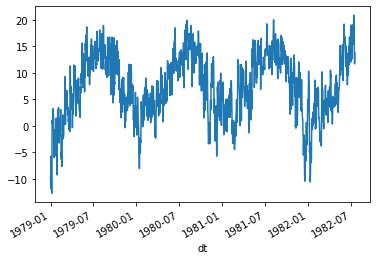

In [86]:
amsterdam1['temp'].head(1300).plot()

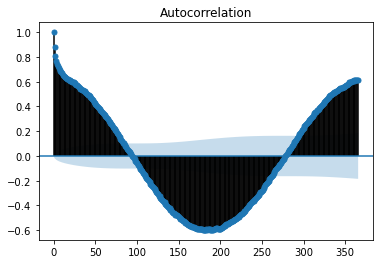

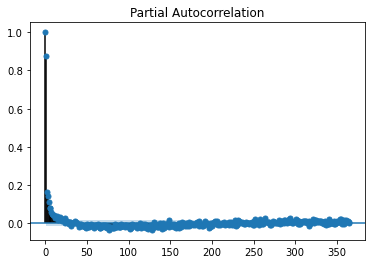

In [94]:
acfplot = plot_acf(amsterdam1['temp'], lags=365)
pacfplot = plot_pacf(amsterdam1['temp'], lags=365)

In [91]:
train = amsterdam1.temp[1:1300]
test = amsterdam1.temp[1:len(amsterdam1)]

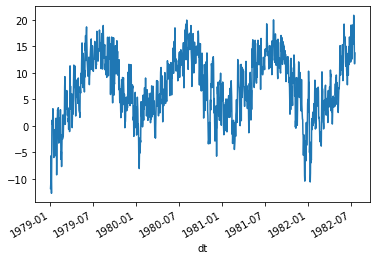

In [93]:
train.plot()

<ipython-input-109-6e6db03d9fdc>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(train, model = 'additive', freq = 365)


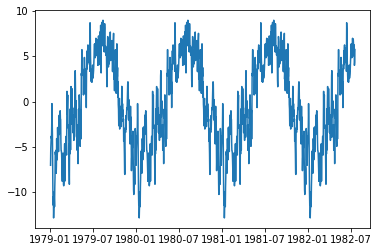

In [109]:
results = seasonal_decompose(train, model = 'additive', freq = 365)
plt.plot(results.seasonal)

In [123]:
adtest = adfuller(train)
print('pvalue =: %f' % adtest[1])

pvalue =: 0.084653


In [135]:
model = SARIMAX(train, 
                    order = (1,1,0), 
                    seasonal_order = (1,1,0,365), 
                    enforce_stationarity= 'false', 
                    enforce_invertibility= 'false')

modelaAIC = model.fit()


/Users/michiel/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/michiel/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


KeyboardInterrupt: 